# UCI Bilkent Arrythmia Detection
# Data Analysis and Preprocessing of Dataset

In [169]:
# Import libraries

import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from matplotlib import rc
from cycler import cycler
colors = sns.color_palette("colorblind")
sns.set_palette(colors)

from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression

# Set viewing option
pd.set_option('display.width', None)

# Suppress the warnings
import warnings
warnings.filterwarnings(action='ignore')

# Import utility functions 
import utilityfunctions as uf

# Import OS for saving (sub)plots
import os

print('Imported libraries successfully.')


Imported libraries successfully.


In [170]:
# set the style for the notebook, in this case colorblind, alternative would be grayscale
uf.set_custom_palette("colorblind")
figures_folder = '../figures' 

# Importing the dataset

In [171]:
# Importing Original Dataset from UCI Database website

cols=['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval', 'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS', 'T', 'P', 'QRST', 'J', 'heartrate', 'chDI_Qwave', 'chDI_Rwave', 'chDI_Swave', 'chDI_RPwave', 'chDI_SPwave', 'chDI_intrinsicReflecttions', 'chDI_RRwaveExists', 'chDI_DD_RRwaveExists', 'chDI_RPwaveExists', 'chDI_DD_RPwaveExists', 'chDI_RTwaveExists', 'chDI_DD_RTwaveExists', 'chDII_Qwave', 'chDII_Rwave', 'chDII_Swave', 'chDII_RPwave', 'chDII_SPwave', 'chDII_intrinsicReflecttions', 'chDII_RRwaveExists', 'chDII_DD_RRwaveExists', 'chDII_RPwaveExists', 'chDII_DD_RPwaveExists', 'chDII_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_Qwave', 'chDIII_Rwave', 'chDIII_Swave', 'chDIII_RPwave', 'chDIII_SPwave', 'chDIII_intrinsicReflecttions', 'chDIII_RRwaveExists', 'chDIII_DD_RRwaveExists', 'chDIII_RPwaveExists', 'chDIII_DD_RPwaveExists', 'chDIII_RTwaveExists', 'chDIII_DD_RTwaveExists', 'chAVR_Qwave', 'chAVR_Rwave', 'chAVR_Swave', 'chAVR_RPwave', 'chAVR_SPwave', 'chAVR_intrinsicReflecttions', 'chAVR_RRwaveExists', 'chAVR_DD_RRwaveExists', 'chAVR_RPwaveExists', 'chAVR_DD_RPwaveExists', 'chAVR_RTwaveExists', 'chAVR_DD_RTwaveExists', 'chAVL_Qwave', 'chAVL_Rwave', 'chAVL_Swave', 'chAVL_RPwave', 'chAVL_SPwave', 'chAVL_intrinsicReflecttions', 'chAVL_RRwaveExists', 'chAVL_DD_RRwaveExists', 'chAVL_RPwaveExists', 'chAVL_DD_RPwaveExists', 'chAVL_RTwaveExists', 'chAVL_DD_RTwaveExists', 'chAVF_Qwave', 'chAVF_Rwave', 'chAVF_Swave', 'chAVF_RPwave', 'chAVF_SPwave', 'chAVF_intrinsicReflecttions', 'chAVF_RRwaveExists', 'chAVF_DD_RRwaveExists', 'chAVF_RPwaveExists', 'chAVF_DD_RPwaveExists', 'chAVF_RTwaveExists', 'chAVF_DD_RTwaveExists', 'chV1_Qwave', 'chV1_Rwave', 'chV1_Swave', 'chV1_RPwave', 'chV1_SPwave', 'chV1_intrinsicReflecttions', 'chV1_RRwaveExists', 'chV1_DD_RRwaveExists', 'chV1_RPwaveExists', 'chV1_DD_RPwaveExists', 'chV1_RTwaveExists', 'chV1_DD_RTwaveExists', 'chV2_Qwave', 'chV2_Rwave', 'chV2_Swave', 'chV2_RPwave', 'chV2_SPwave', 'chV2_intrinsicReflecttions', 'chV2_RRwaveExists', 'chV2_DD_RRwaveExists', 'chV2_RPwaveExists', 'chV2_DD_RPwaveExists', 'chV2_RTwaveExists', 'chV2_DD_RTwaveExists', 'chV3_Qwave', 'chV3_Rwave', 'chV3_Swave', 'chV3_RPwave', 'chV3_SPwave', 'chV3_intrinsicReflecttions', 'chV3_RRwaveExists', 'chV3_DD_RRwaveExists', 'chV3_RPwaveExists', 'chV3_DD_RPwaveExists', 'chV3_RTwaveExists', 'chV3_DD_RTwaveExists', 'chV4_Qwave', 'chV4_Rwave', 'chV4_Swave', 'chV4_RPwave', 'chV4_SPwave', 'chV4_intrinsicReflecttions', 'chV4_RRwaveExists', 'chV4_DD_RRwaveExists', 'chV4_RPwaveExists', 'chV4_DD_RPwaveExists', 'chV4_RTwaveExists', 'chV4_DD_RTwaveExists', 'chV5_Qwave', 'chV5_Rwave', 'chV5_Swave', 'chV5_RPwave', 'chV5_SPwave', 'chV5_intrinsicReflecttions', 'chV5_RRwaveExists', 'chV5_DD_RRwaveExists', 'chV5_RPwaveExists', 'chV5_DD_RPwaveExists', 'chV5_RTwaveExists', 'chV5_DD_RTwaveExists', 'chV6_Qwave', 'chV6_Rwave', 'chV6_Swave', 'chV6_RPwave', 'chV6_SPwave', 'chV6_intrinsicReflecttions', 'chV6_RRwaveExists', 'chV6_DD_RRwaveExists', 'chV6_RPwaveExists', 'chV6_DD_RPwaveExists', 'chV6_RTwaveExists', 'chV6_DD_RTwaveExists', 'chDI_JJwaveAmp', 'chDI_QwaveAmp', 'chDI_RwaveAmp', 'chDI_SwaveAmp', 'chDI_RPwaveAmp', 'chDI_SPwaveAmp', 'chDI_PwaveAmp', 'chDI_TwaveAmp', 'chDI_QRSA', 'chDI_QRSTA', 'chDII_JJwaveAmp', 'chDII_QwaveAmp', 'chDII_RwaveAmp', 'chDII_SwaveAmp', 'chDII_RPwaveAmp', 'chDII_SPwaveAmp', 'chDII_PwaveAmp', 'chDII_TwaveAmp', 'chDII_QRSA', 'chDII_QRSTA', 'chDIII_JJwaveAmp', 'chDIII_QwaveAmp', 'chDIII_RwaveAmp', 'chDIII_SwaveAmp', 'chDIII_RPwaveAmp', 'chDIII_SPwaveAmp', 'chDIII_PwaveAmp', 'chDIII_TwaveAmp', 'chDIII_QRSA', 'chDIII_QRSTA', 'chAVR_JJwaveAmp', 'chAVR_QwaveAmp', 'chAVR_RwaveAmp', 'chAVR_SwaveAmp', 'chAVR_RPwaveAmp', 'chAVR_SPwaveAmp', 'chAVR_PwaveAmp', 'chAVR_TwaveAmp', 'chAVR_QRSA', 'chAVR_QRSTA', 'chAVL_JJwaveAmp', 'chAVL_QwaveAmp', 'chAVL_RwaveAmp', 'chAVL_SwaveAmp', 'chAVL_RPwaveAmp', 'chAVL_SPwaveAmp', 'chAVL_PwaveAmp', 'chAVL_TwaveAmp', 'chAVL_QRSA', 'chAVL_QRSTA', 'chAVF_JJwaveAmp', 'chAVF_QwaveAmp', 'chAVF_RwaveAmp', 'chAVF_SwaveAmp', 'chAVF_RPwaveAmp', 'chAVF_SPwaveAmp', 'chAVF_PwaveAmp', 'chAVF_TwaveAmp', 'chAVF_QRSA', 'chAVF_QRSTA', 'chV1_JJwaveAmp', 'chV1_QwaveAmp', 'chV1_RwaveAmp', 'chV1_SwaveAmp', 'chV1_RPwaveAmp', 'chV1_SPwaveAmp', 'chV1_PwaveAmp', 'chV1_TwaveAmp', 'chV1_QRSA', 'chV1_QRSTA', 'chV2_JJwaveAmp', 'chV2_QwaveAmp', 'chV2_RwaveAmp', 'chV2_SwaveAmp', 'chV2_RPwaveAmp', 'chV2_SPwaveAmp', 'chV2_PwaveAmp', 'chV2_TwaveAmp', 'chV2_QRSA', 'chV2_QRSTA', 'chV3_JJwaveAmp', 'chV3_QwaveAmp', 'chV3_RwaveAmp', 'chV3_SwaveAmp', 'chV3_RPwaveAmp', 'chV3_SPwaveAmp', 'chV3_PwaveAmp', 'chV3_TwaveAmp', 'chV3_QRSA', 'chV3_QRSTA', 'chV4_JJwaveAmp', 'chV4_QwaveAmp', 'chV4_RwaveAmp', 'chV4_SwaveAmp', 'chV4_RPwaveAmp', 'chV4_SPwaveAmp', 'chV4_PwaveAmp', 'chV4_TwaveAmp', 'chV4_QRSA', 'chV4_QRSTA', 'chV5_JJwaveAmp', 'chV5_QwaveAmp', 'chV5_RwaveAmp', 'chV5_SwaveAmp', 'chV5_RPwaveAmp', 'chV5_SPwaveAmp', 'chV5_PwaveAmp', 'chV5_TwaveAmp', 'chV5_QRSA', 'chV5_QRSTA', 'chV6_JJwaveAmp', 'chV6_QwaveAmp', 'chV6_RwaveAmp', 'chV6_SwaveAmp', 'chV6_RPwaveAmp', 'chV6_SPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSA', 'chV6_QRSTA', 'class']
df = pd.read_csv('arrhythmia.csv', names=cols)
df.head(3)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


# General DataFrame Analysis

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [173]:
df.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [174]:
df.isna().sum()
print('The dataset seems to not contain any NA empty values')

The dataset seems to not contain any NA empty values


In [175]:
df_duplicates = df[df.duplicated()]
#print(df_duplicates)
print('There are no duplicated rows')

There are no duplicated rows


In [176]:
df.dtypes
print('The sex feature is already in 0-1 format, will check int64 vs float on the features, but first will review the object dtypes')

The sex feature is already in 0-1 format, will check int64 vs float on the features, but first will review the object dtypes


# Fixing the Object Columns

In [177]:
# create a list of the obj column names
df_obj = df.select_dtypes(include=['object']).columns
df_obj

Index(['T', 'P', 'QRST', 'J', 'heartrate'], dtype='object')

In [178]:
# first swap the '?' with a NaN
for o in df_obj:
    df[o] = df[o].apply(pd.to_numeric, downcast='float', errors='coerce')

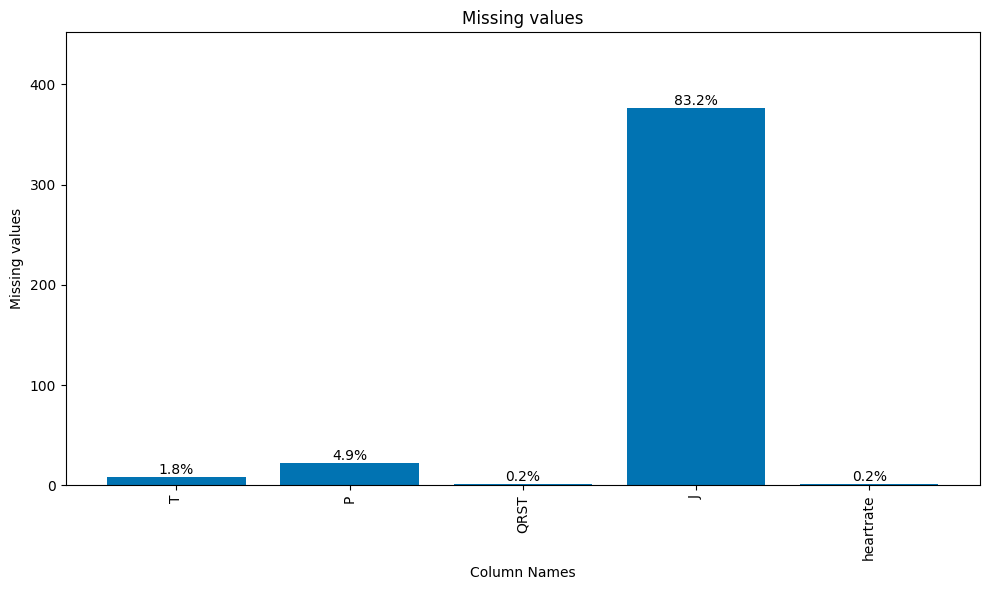

In [181]:
# Plotting the missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_stats['column_name'], missing_stats['no_of_missing'])
plt.title('Missing values')
plt.xlabel('Column Names')
plt.ylabel('Missing values')
plt.xticks(rotation=90)
for i, value in enumerate(missing_stats['percent_missing']):
    plt.text(i, missing_stats['no_of_missing'][i], f"{value:.1f}%", ha='center', va='bottom')
plt.ylim(0, len(df))
plt.tight_layout() 

# Save the plot into the 'figures' folder one level above the current folder
filename = 'uci_missing_values.png'
filepath = '../figures/' + filename
plt.savefig(filepath)  

plt.show()

NaN % in T : 2.0
NaN % in P : 5.0
NaN % in QRST : 0.0
NaN % in J : 83.0
NaN % in heartrate : 0.0


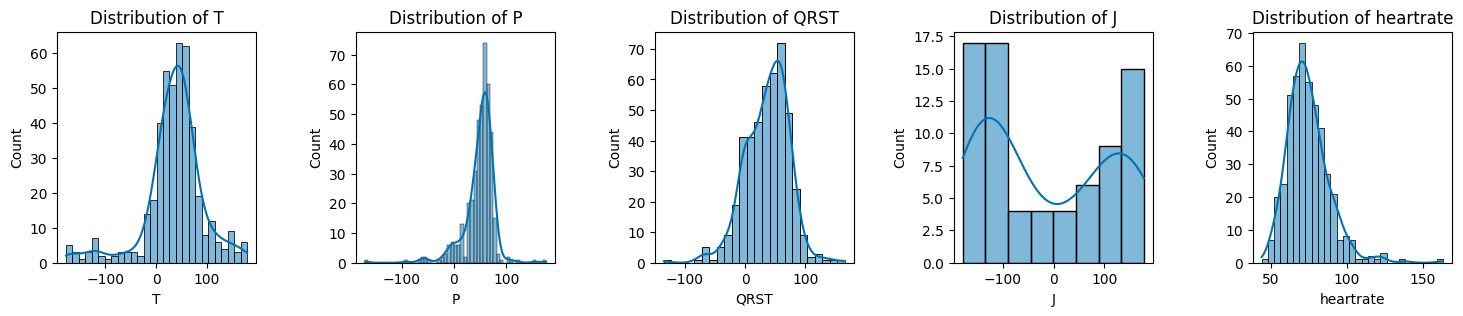

In [191]:
# Plotting distribution for columns with missing values
f, axes = plt.subplots(1, len(df_obj), figsize=(18, 3))
for i, o in enumerate(df_obj):
    sns.histplot(x=df[o], kde=True, stat='count', ax=axes[i])
    axes[i].set_title(f'Distribution of {o}')
    print('NaN % in', o, ':', (df[o].isna().sum() / len(df[o])).round(2) * 100)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

# Save each subplot into the figures folder and display combined subplots in the cell output
for i, o in enumerate(df_obj):
    filename = f'uci_distribution_{o}.png'
    filepath = os.path.join(figures_folder, filename)
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size for individual plots
    sns.histplot(x=df[o], kde=True, stat='count', ax=ax)
    ax.set_title(f'Distribution of {o}')
    plt.savefig(filepath)  # Save individual subplot
    plt.close()  # Close individual plot to avoid displaying it in the cell output

# Display the combined plot in the cell output
plt.show()

In [129]:
## Filling the missing heart rate value with the mean of a similar group

# Find the patient with missing heart rate
missing_idx = df[df['heartrate'].isna() == True].index[0]
# Defining a tolerance for selecting a similar groups to the patient with a missing value
tolerance = 20
# Define the criteria for similarity and find similar patients (sex, age, height, weight)
similar = df[(df.index != missing_idx) &
             (df['sex'] == df.at[missing_idx, 'sex']) &
             (abs(df['age'] - df.at[missing_idx, 'age']) <= tolerance) &
             (abs(df['height'] - df.at[missing_idx, 'height']) <= tolerance) &
             (abs(df['weight'] - df.at[missing_idx, 'weight']) <= tolerance)]

# Replace the missing heart rate with the median value of similar patients
df.at[missing_idx, 'heartrate'] = similar['heartrate'].astype(int).median().astype(int)

# Transforming the heart rate column into a numeric one
df['heartrate'] = pd.to_numeric(df['heartrate'])

In [130]:
## Remove/fill missing values 
# 1st approach: using nearest neighbor

imputer = KNNImputer(n_neighbors=2,weights="uniform")
df1 = imputer.fit_transform(df)
df1 = pd.DataFrame(df1)
df1.columns = df.columns
df1.isnull().sum().sort_values(ascending=False)

##################################################
## 2nd approach: simply fill with mean value
## Fill missing values with the mean of their respective columns 
#print('before: ', df_sel.isna().sum().sum())
#means = df_sel.mean()
##Replace missing values with 
#df_sel_filled = df_sel.fillna(means)
#print('after: ', df_sel_filled.isna().sum().sum())

age                 0
chDIII_SPwaveAmp    0
chAVR_QwaveAmp      0
chAVR_JJwaveAmp     0
chDIII_QRSTA        0
                   ..
chV2_Qwave          0
chV2_Rwave          0
chV2_Swave          0
chV2_RPwave         0
class               0
Length: 280, dtype: int64

In [196]:
# making our new dataframe our new dataframe
df = df1

In [197]:
# now we drop the J column, as it is mostly NaN
df.drop('J', axis=1, inplace=True)
df.head(3)

KeyError: "['J'] not found in axis"

In [ ]:
#Check for missing data 
df.isna().sum().sum()
df.isnull().sum().sort_values(ascending=False)

age                0
chDIII_PwaveAmp    0
chAVR_RwaveAmp     0
chAVR_QwaveAmp     0
chAVR_JJwaveAmp    0
                  ..
chV2_Rwave         0
chV2_Swave         0
chV2_RPwave        0
chV2_SPwave        0
class              0
Length: 279, dtype: int64

# Statistical Tests

In [ ]:
# Pearson's Correlation test
from scipy.stats import pearsonr
proindie = {}
prodependent = {}
unknown = {}
for c in df.columns:
    data1 = df[c]
    data2 = df['class']
    stat, p = pearsonr(data1, data2)
#    print(c, 'stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        proindie[c] = (stat,p)
    elif p > 0.00:
        prodependent[c] = (stat,p)
    else:
        unknown = {}
dependents = pd.DataFrame.from_dict(prodependent, orient='index', columns=['stat', 'p'])
dependents['stat'] = dependents['stat'].round(3)
dependents['p'] = dependents['p'].round(3)
dependents.T
dependents.index
len(dependents)

77

In [ ]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
gaus = {}
nogaus = {}
unknown = {}
for c in df.columns:
    data = df[c]
    stat, p = shapiro(data)
#    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        gaus[c] = (stat,p)
    elif p > 0.00:
        nogaus[c] = (stat,p)
    else:
        unknown = {}
        
gauses = pd.DataFrame.from_dict(gaus, orient='index', columns=['stat', 'p'])
gauses['stat'] = gauses['stat'].round(3)
gauses['p'] = gauses['p'].round(3)
gauses.T
gauses.index
print(len(gaus),len(nogaus),len(unknown))

17 262 0


# Univariate Variable Analysis

We see some outliers in age, height, and weight, which we will investigate.


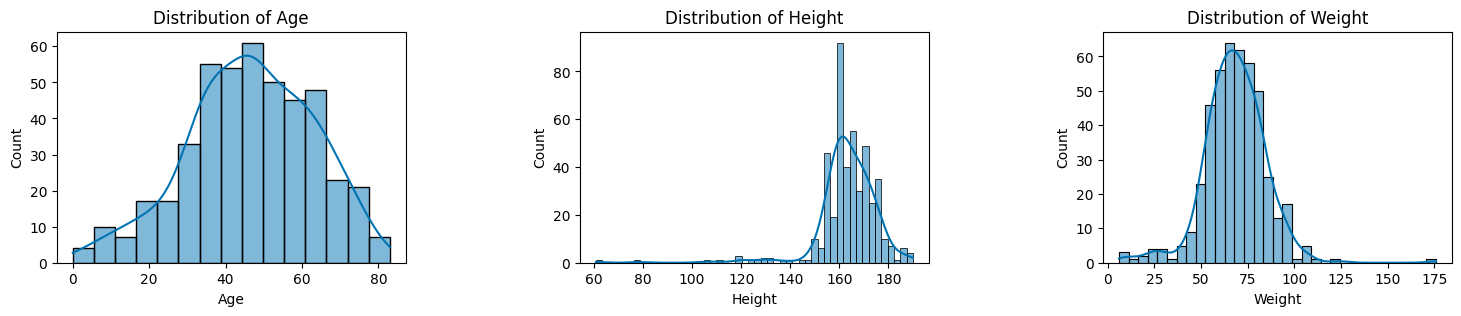

In [198]:
# Define the columns to plot
ahw = ['age', 'height', 'weight']

# Create subplots to plot the distribution of age, height, and weight columns
fig, axes = plt.subplots(1, 3, figsize=(18, 3))

# Iterate through the columns and plot each one
for i, c in enumerate(ahw):
    sns.histplot(x=df[c], ax=axes[i], kde=True, stat='count')
    axes[i].set_title(f'Distribution of {c.capitalize()}')
    axes[i].set_xlabel(c.capitalize())
    axes[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

# Save each subplot into the figures folder 
for i, c in enumerate(ahw):
    filename = f'uci_distribution_{c}.png'
    filepath = os.path.join(figures_folder, filename)
    plt.figure(figsize=(8, 6))  
    sns.histplot(x=df[c], kde=True, stat='count')  
    plt.title(f'Distribution of {c.capitalize()}')  
    plt.xlabel(c.capitalize())  
    plt.ylabel('Count') 
    plt.tight_layout() 
    plt.savefig(filepath)  
    plt.close() 

# Print a comment
print('We see some outliers in age, height, and weight, which we will investigate.')


In [199]:
## this appears to be a baby
df['age'].min()
df.loc[df['age'] == 0]
baby = df.loc[df['age'] == 0].index
# beby seems close to one year old considering the weight. The height needs to be converted *0.1, though 
df.loc[baby,'height'] = df.loc[baby,'height']*0.1
df.loc[baby]
# looking at the diagnosis of 5 and a quick web research, it seems to be plausible
# https://www.luriechildrens.org/en/specialties-conditions/tachycardia/

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class,label
316,0.0,0.0,6.08,10.0,83.0,126.0,232.0,128.0,60.0,125.0,...,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5.0,1


In [200]:
## this also appears to be a baby
df['height'].max()
df.loc[df['height'] == 780]
baby2 = df.loc[df['height'] == 780].index
# baby2 height needs to be converted *0.1 
df.loc[baby2,'height'] = df.loc[baby2,'height']*0.1
df.loc[baby2]
# looking at the diagnosis of 5 and a quick web research, it seems to be plausible
# https://www.luriechildrens.org/en/specialties-conditions/tachycardia/


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class,label


After fixing the outliers, the distributions look more plausible.


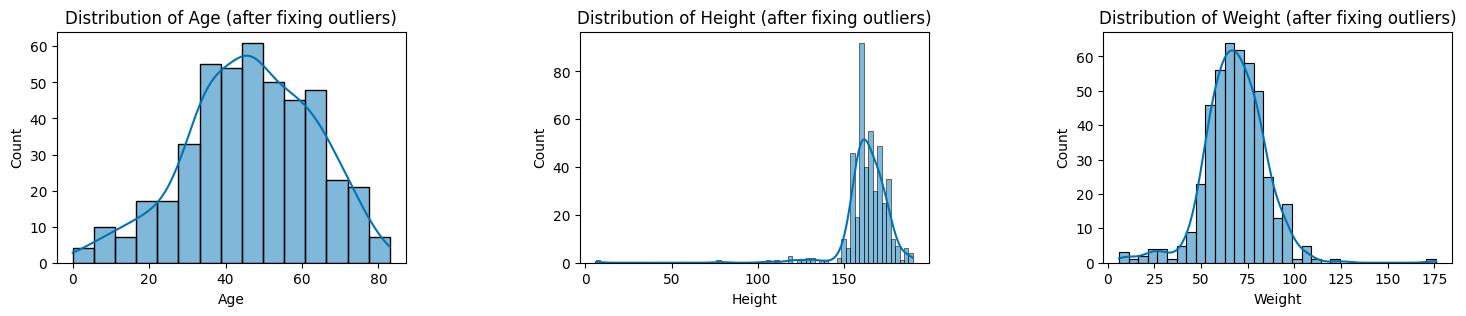

In [201]:
# Create subplots to plot the distribution of age, height, and weight columns after fixing outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 3))

# Iterate through the columns and plot each one
for i, c in enumerate(ahw):
    sns.histplot(x=df[c], ax=axes[i], kde=True, stat='count')
    axes[i].set_title(f'Distribution of {c.capitalize()} (after fixing outliers)')
    axes[i].set_xlabel(c.capitalize())
    axes[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

# Save each subplot into the figures folder with appropriate filename prefix and reference
for i, c in enumerate(ahw):
    filename = f'uci_distribution_{c}_fixed_outliers.png'
    filepath = os.path.join(figures_folder, filename)
    plt.figure(figsize=(8, 6))  
    sns.histplot(x=df[c], kde=True, stat='count')  
    plt.title(f'Distribution of {c.capitalize()} (after fixing outliers)')  
    plt.xlabel(c.capitalize())  
    plt.ylabel('Count')  
    plt.tight_layout()  
    plt.savefig(filepath)  
    plt.close()  

# Print a comment
print('After fixing the outliers, the distributions look more plausible.')


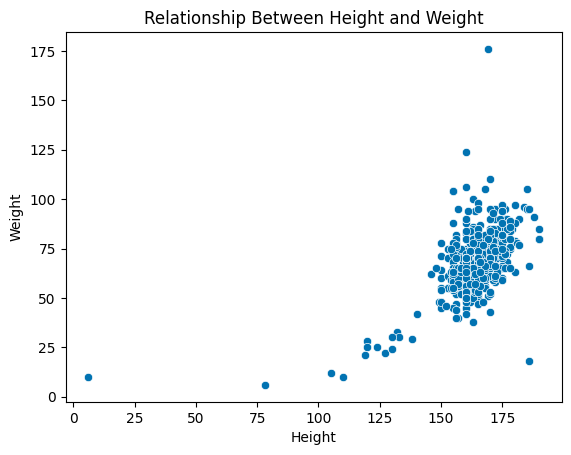

The weight-height relationship appears plausible.


In [202]:
# Plotting the relationship between weight and height
sns.scatterplot(data=df, x='height', y='weight')
plt.title('Relationship Between Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

# Save the plot
filename = 'uci_weight_height_relationship.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

print('The weight-height relationship appears plausible.')

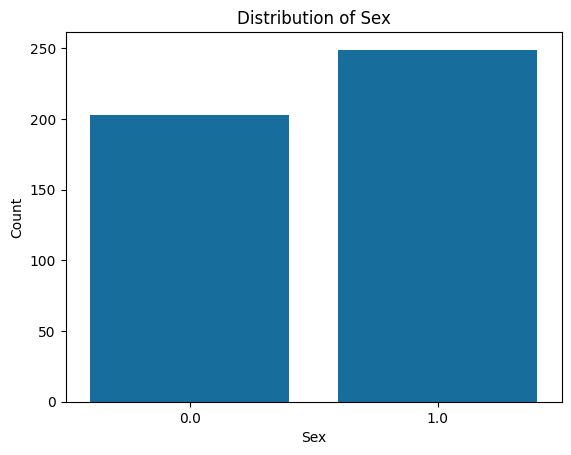

Sex looks fairly normally distributed - slightly more males in the sample set, but not an issue


In [203]:
# Plot the count of each category in the 'sex' column
sns.countplot(x=df['sex'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Save the plot into the figures folder
filename = 'uci_distribution_sex.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

print('Sex looks fairly normally distributed - slightly more males in the sample set, but not an issue')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


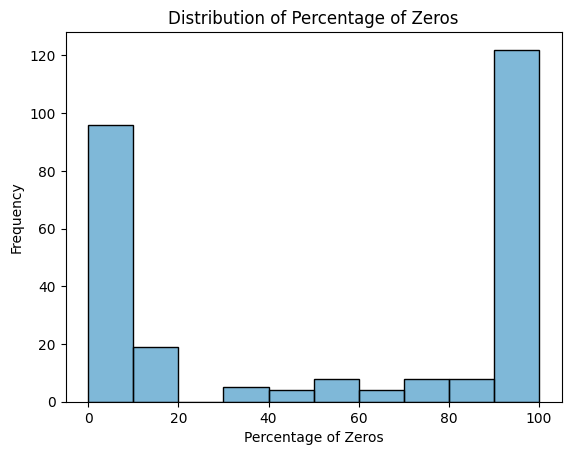

With so many of the ECG lead columns being 90-100% zeros, it raises the question of how to proceed with them - perhaps taking this into consideration when viewing the correlation data


In [240]:
# Convert the dictionary to a DataFrame
zeros_df = pd.DataFrame.from_dict(zeros, orient='index', columns=['Percentage'])

# Remove categorical target columns
categorical_target = ['age', 'sex', 'height', 'weight', 'class']
zeros_df.drop(categorical_target, axis=0, inplace=True)

# Plot the histogram of the percentage of zeros
sns.histplot(zeros_df)
plt.title('Distribution of Percentage of Zeros')
plt.xlabel('Percentage of Zeros')
plt.ylabel('Frequency')
plt.legend().remove()

# Save the plot into the figures folder with a proper filename prefix
filename = 'uci_distribution_zeros.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

print('With so many of the ECG lead columns being 90-100% zeros, it raises the question of how to proceed with them - perhaps taking this into consideration when viewing the correlation data')

# Multivariate Analysis

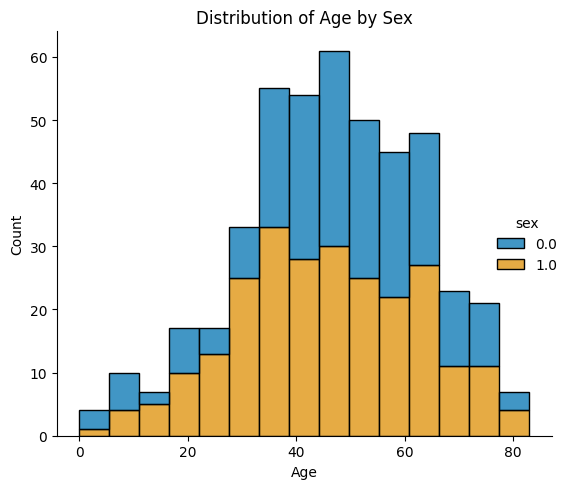

In combination, sex and age are also quite evenly distributed


In [239]:
# Plot the distribution of age with hue as sex 
sns.displot(data=df, x="age", hue="sex", multiple="stack")
plt.title('Distribution of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()  

# Save the plot into the figures folder 
filename = 'uci_age_distribution_by_sex.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

# Display the plot
plt.show()

print('In combination, sex and age are also quite evenly distributed')

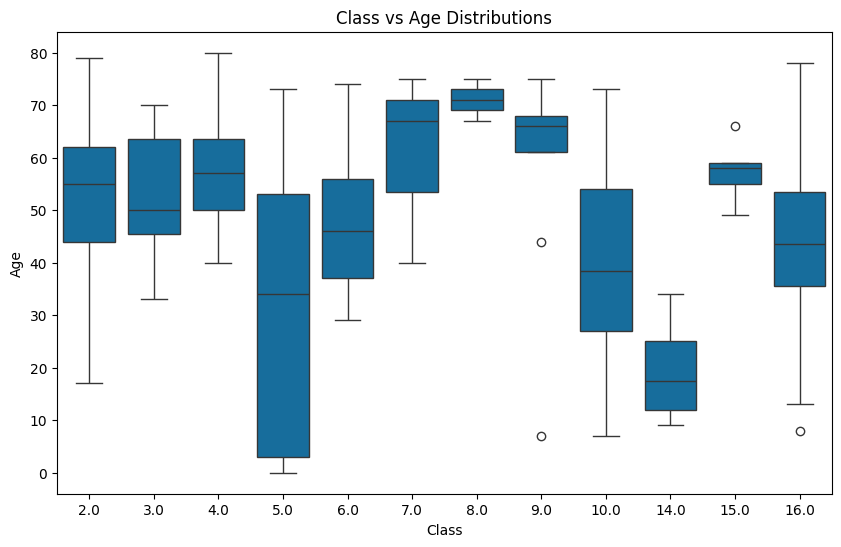

In [206]:
# Filter the dataframe to include only non-diagnosed instances
diagnosed = df[df['class'] != 1]

# Create a boxplot of age distributions for each class
plt.figure(figsize=(10, 6))
sns.boxplot(data=diagnosed, x='class', y='age')
plt.title('Class vs Age Distributions')
plt.xlabel('Class')
plt.ylabel('Age')

# Save the plot into the figures folder with a proper filename prefix
filename = 'uci_class_age_distributions.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

In [207]:
# Continuous variables

print("Median value by diagnosis : ", end="\n\n")
print(df[['sex', 'age', 'weight', 'height',
             'heartrate']].groupby(df['class']).median(),
      end="\n\n")

# Proportions

print("Proportion: ", end="\n\n")
print(
    df.groupby("class")['sex'].value_counts(normalize=True).apply(lambda x: round(x, 2)*100),
    end="\n\n")


Median value by diagnosis : 

       sex   age  weight  height  heartrate
class                                      
1.0    1.0  46.0    68.0   163.0       72.0
2.0    1.0  55.0    70.0   160.5       77.0
3.0    0.0  50.0    74.0   170.0       78.0
4.0    0.0  57.0    76.0   165.0       81.0
5.0    1.0  34.0    51.0   160.0      104.0
6.0    0.0  46.0    66.0   165.0       54.0
7.0    0.0  67.0    74.0   176.0       74.0
8.0    0.0  71.0    79.0   176.5       66.0
9.0    1.0  66.0    72.0   158.0       64.0
10.0   0.0  38.5    63.5   165.0       71.5
14.0   0.0  17.5    51.5   167.0       83.5
15.0   1.0  58.0    78.0   160.0       81.0
16.0   0.0  43.5    70.5   168.0       70.5

Proportion: 

class  sex
1.0    1.0     65.0
       0.0     35.0
2.0    1.0     59.0
       0.0     41.0
3.0    0.0    100.0
4.0    0.0     73.0
       1.0     27.0
5.0    1.0     69.0
       0.0     31.0
6.0    0.0     56.0
       1.0     44.0
7.0    0.0    100.0
8.0    0.0    100.0
9.0    1.0     56.0
    

In [208]:
## Create class vs frequency 
#sorted(df['class'].unique())
counts = {
    "value":[],
    "freq":[]
}

for i in df['class'].unique():
    counts['value'].append(i)
    counts['freq'].append(len(df[df['class'] ==  i]))

    
c = pd.DataFrame(counts)
c.sort_values(by="value")

,value,freq
3,1.0,245
8,2.0,44
6,3.0,15
9,4.0,15
10,5.0,13
1,6.0,25
4,7.0,3
0,8.0,2
11,9.0,9
2,10.0,50


In [209]:
pd.DataFrame(df.columns,columns=["Features"])

,Features
0,age
1,sex
2,height
3,weight
4,QRSduration
...,...
275,chV6_TwaveAmp
276,chV6_QRSA
277,chV6_QRSTA
278,class


In [210]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0,1
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0,1


# Target Analysis

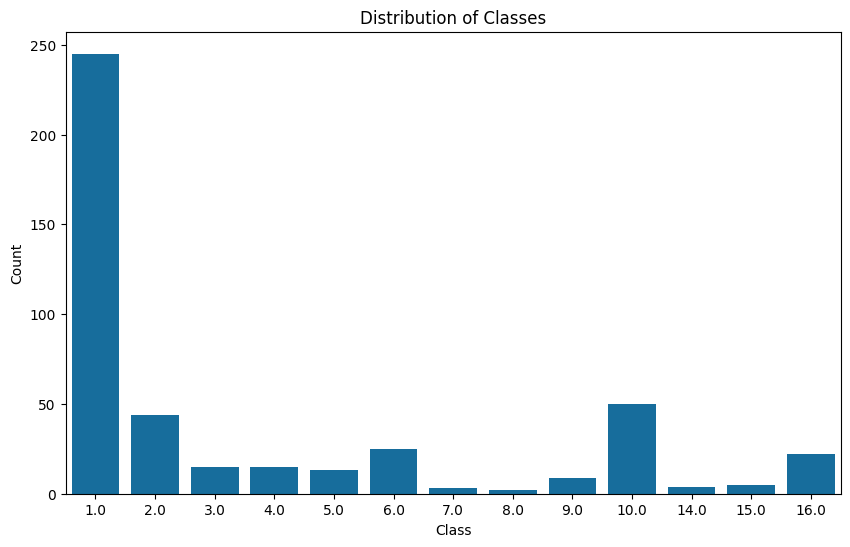

In [211]:
# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Save the plot into the figures folder with a proper filename prefix
filename = 'uci_distribution_classes.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

In [212]:
### Different risks instead of classes

norm_risk_list = []

for diagnose in df['class']:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)

df["label"] = np.array(norm_risk_list)

#df.drop(columns = ["diagnosis"],inplace = True)

df.label.value_counts()

label
True     245
False    207
Name: count, dtype: int64

In [213]:
df['label'] = np.where(df["class"] == 1, 0, 1)
df['label'] = df['label'].astype('int')
df.label.value_counts()

label
0    245
1    207
Name: count, dtype: int64

In [214]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0,1
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0,1


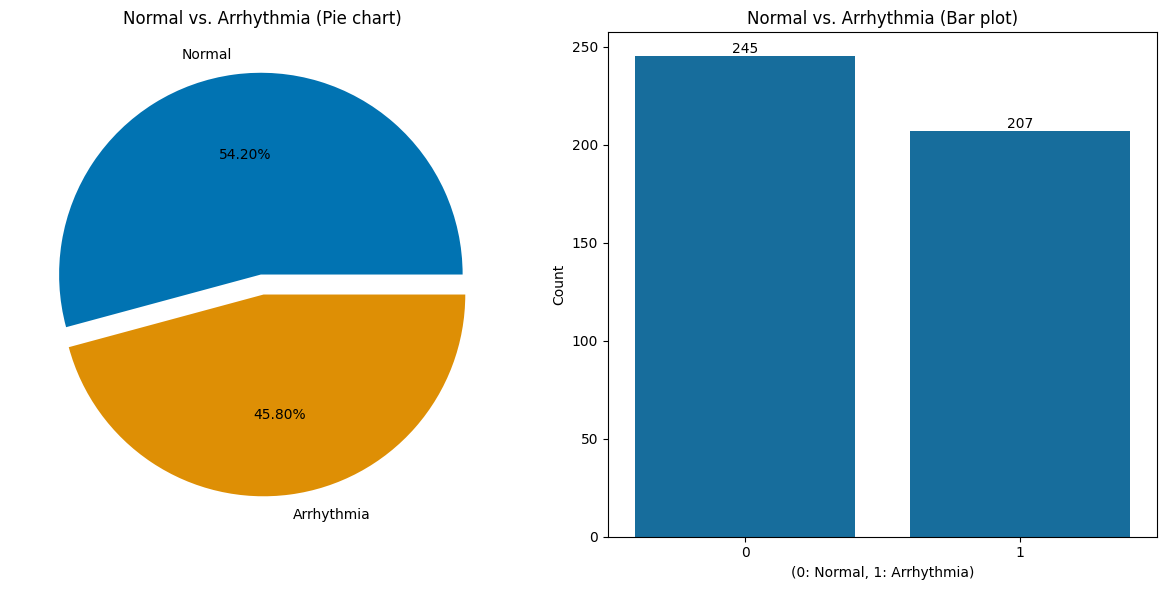

In [215]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart
label_counts = df['label'].value_counts(normalize=True)
axs[0].pie(label_counts, labels=['Normal', 'Arrhythmia'], explode=[0.05, 0.05], autopct="%0.2f%%")
axs[0].set_title('Normal vs. Arrhythmia (Pie chart)')

# Plot countplot
ax = sns.countplot(data=df, x='label', ax=axs[1])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            '{:.0f}'.format(p.get_height()), 
            ha='center', va='bottom')
ax.set_xlabel('(0: Normal, 1: Arrhythmia)')
ax.set_ylabel('Count')
ax.set_title('Normal vs. Arrhythmia (Bar plot)')

# Adjust layout
plt.tight_layout() 

# Save the plot into the figures folder with a proper filename prefix
filename = 'uci_normal_vs_diagnosis_plots.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

In [216]:
df.info()
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to label
dtypes: float64(279), int64(1)
memory usage: 988.9 KB


0

# Correlation Analysis

In [217]:
# OPTION ONE - Threshhold
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor['label'])
#Selecting highly correlated features
signif_features = cor_target[cor_target>0.01]
signif_features.index

## Can also ask for k number of top correlating features
# Defining a function to get the top correlated variables to diagnosis
get_top_correlated_variables = lambda df: df.corr()['class'].abs().sort_values(ascending=False).index[1:11]

# Get top correlated variables 
top_correlated_columns = get_top_correlated_variables(df)
print("Top 10 variables highest correlated with diagnosis:")
print(top_correlated_columns)

Top 10 variables highest correlated with diagnosis:
Index(['label', 'chV1_RPwave', 'QRSduration', 'chV1_intrinsicReflecttions',
       'chV2_RPwave', 'chV1_RPwaveAmp', 'chV2_RPwaveAmp', 'chDI_SwaveAmp',
       'chDI_Swave', 'chV3_SwaveAmp'],
      dtype='object')


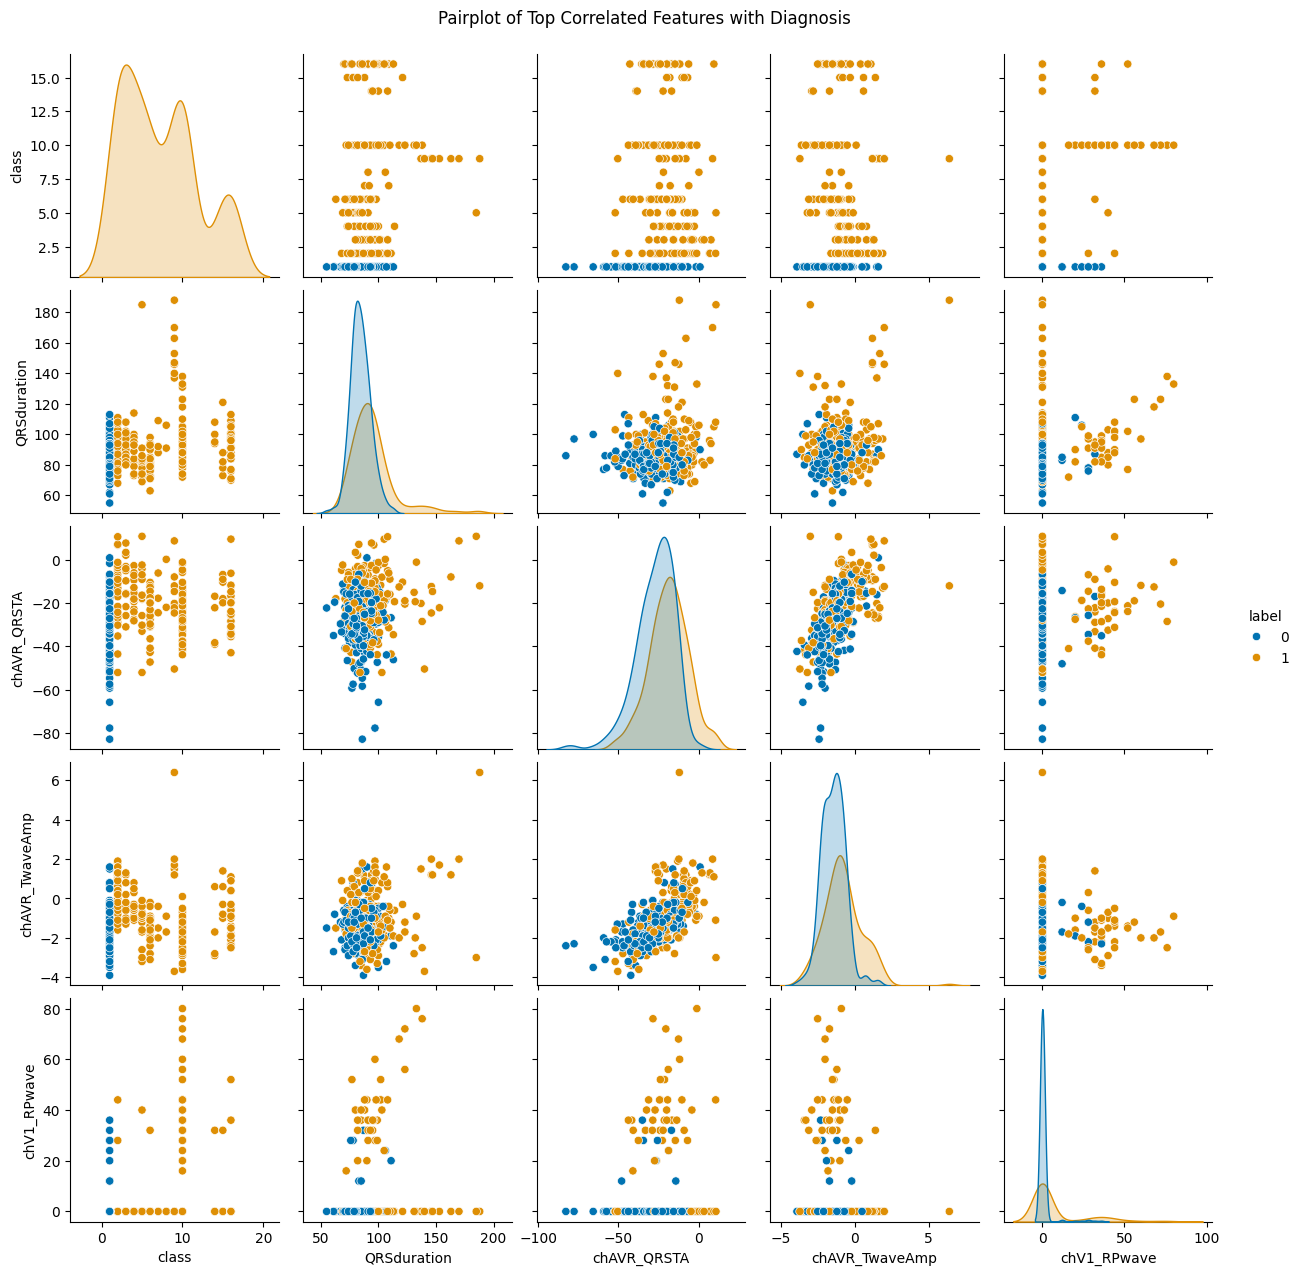

In [218]:
# Compute correlation matrix
corr_matrix = df.corr()

# Sort correlations with respect to 'diagnosis' column
corr_with_diagnosis_binary = corr_matrix['label'].sort_values(ascending=False)

# Select top 5 correlated columns (excluding 'diagnosis_binary' itself)
top_correlated_columns = corr_with_diagnosis_binary.index[1:6]

# Select those columns along with 'diagnosis_binary' for pairplot
pairplot_data = df[['label'] + list(top_correlated_columns)]

# Create pairplot
pairplot = sns.pairplot(pairplot_data, hue='label')
pairplot.fig.suptitle('Pairplot of Top Correlated Features with Diagnosis', y=1.02)

# Save the plot into the figures folder with a proper filename prefix
filename = 'uci_pairplot_top_correlated.png'
filepath = os.path.join(figures_folder, filename)
pairplot.savefig(filepath)

plt.show()


In [219]:
## OPTION TWO
## Select only interesting columns Delete all unimportant columns
## NOTE: selected only general columns and columns of channel DI
selected_columns = pd.concat([df.iloc[:, 0:27], df.iloc[:, 159:170], df.iloc[:, -1]], axis=1)
# Create a new DataFrame with selected columns
df_subset= pd.DataFrame(selected_columns)
df_subset.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,1
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,-0.7,0.0,0.0,1.1,1.9,27.3,45.1,0.1,0.0,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-1.4,0.0,0.0,0.9,2.3,9.6,31.6,0.1,0.0,1


In [220]:
## Create subset of dataset based on high correlations
corr = df.corr()
cor_target = abs(corr['label'])
features = cor_target[cor_target > 0.2]

# Extract subset of dataframe with highly correlated features
df_subset_1 = df[features.index]
df_subset_1.drop(columns=['class'], inplace=True)
df_subset_1.head()

,sex,QRSduration,Tinterval,chV1_RPwave,chV1_intrinsicReflecttions,chV2_Qwave,chV2_RPwave,chV3_Qwave,chDI_SwaveAmp,chDI_TwaveAmp,...,chV1_RPwaveAmp,chV1_QRSTA,chV2_QwaveAmp,chV3_QwaveAmp,chV3_QRSA,chV3_QRSTA,chV5_TwaveAmp,chV6_TwaveAmp,chV6_QRSTA,label
0,0.0,91.0,174.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.1,...,0.0,-29.7,0.0,0.0,-3.9,52.7,3.9,2.9,49.4,1
1,1.0,81.0,149.0,0.0,16.0,0.0,0.0,0.0,0.0,1.5,...,0.0,-26.8,0.0,0.0,-5.7,27.7,2.6,2.1,38.8,1
2,0.0,138.0,185.0,76.0,100.0,0.0,60.0,0.0,-2.8,2.5,...,6.5,-13.6,0.0,0.0,20.4,23.3,3.4,3.4,49.0,1
3,0.0,100.0,179.0,0.0,0.0,0.0,0.0,0.0,-0.7,1.9,...,0.0,-22.4,0.0,0.0,7.6,51.0,3.0,2.6,61.6,0
4,0.0,88.0,177.0,0.0,0.0,0.0,0.0,0.0,-1.4,2.3,...,0.0,-30.0,0.0,0.0,-4.0,43.0,2.9,3.9,62.8,1


In [221]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0,1
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0,1


In [222]:
### Select subset using SelectKBest

data = df.drop(columns= ['label','class'])
target = df['label']
sk = SelectKBest(f_regression, k=20)

sk.fit(X = data, y = target)

data.columns[sk.get_support()]

Index(['sex', 'QRSduration', 'Tinterval', 'chV1_RPwave',
       'chV1_intrinsicReflecttions', 'chV2_Qwave', 'chV2_RPwave', 'chV3_Qwave',
       'chDI_TwaveAmp', 'chDI_QRSTA', 'chDII_TwaveAmp', 'chDII_QRSTA',
       'chAVR_TwaveAmp', 'chAVR_QRSTA', 'chAVL_TwaveAmp', 'chV3_QRSA',
       'chV3_QRSTA', 'chV5_TwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSTA'],
      dtype='object')

In [223]:
df_subset_1.columns

Index(['sex', 'QRSduration', 'Tinterval', 'chV1_RPwave',
       'chV1_intrinsicReflecttions', 'chV2_Qwave', 'chV2_RPwave', 'chV3_Qwave',
       'chDI_SwaveAmp', 'chDI_TwaveAmp', 'chDI_QRSTA', 'chDII_SwaveAmp',
       'chDII_TwaveAmp', 'chDII_QRSTA', 'chAVR_TwaveAmp', 'chAVR_QRSTA',
       'chAVL_TwaveAmp', 'chV1_RPwaveAmp', 'chV1_QRSTA', 'chV2_QwaveAmp',
       'chV3_QwaveAmp', 'chV3_QRSA', 'chV3_QRSTA', 'chV5_TwaveAmp',
       'chV6_TwaveAmp', 'chV6_QRSTA', 'label'],
      dtype='object')

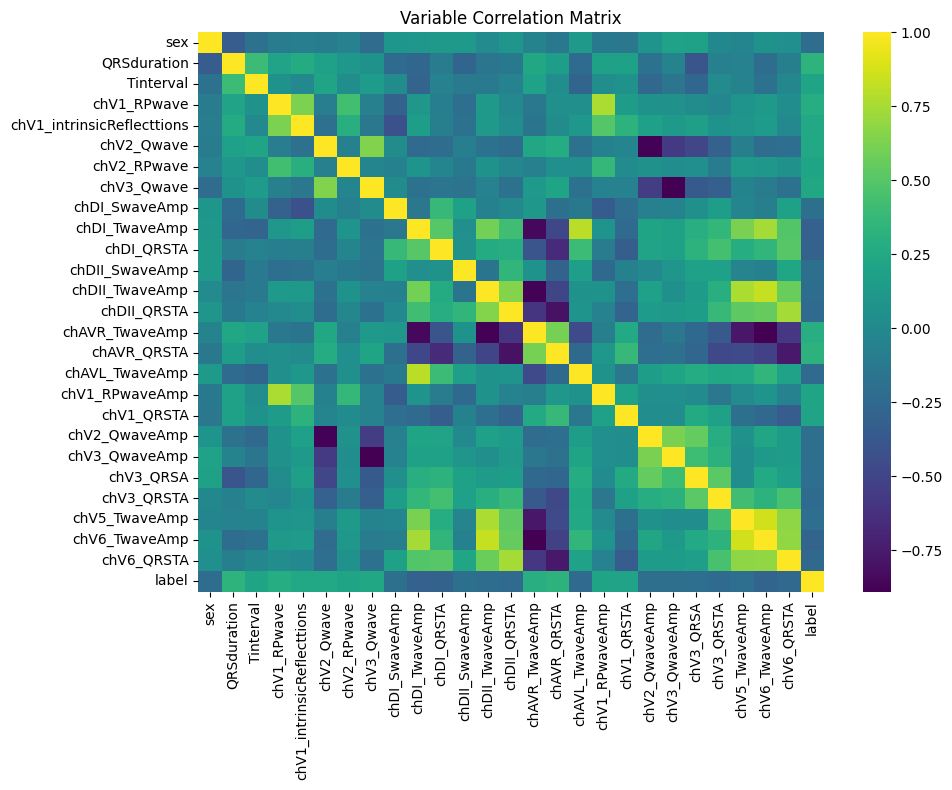

In [241]:
# Variable correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_subset_1.corr(), annot=False, cmap='viridis', fmt=".2f")
plt.title('Variable Correlation Matrix')
plt.tight_layout()  

# Save the plot into the figures folder with a proper filename prefix
filename = 'uci_variable_corr_matrix_subset1.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

# Display the plot
plt.show()

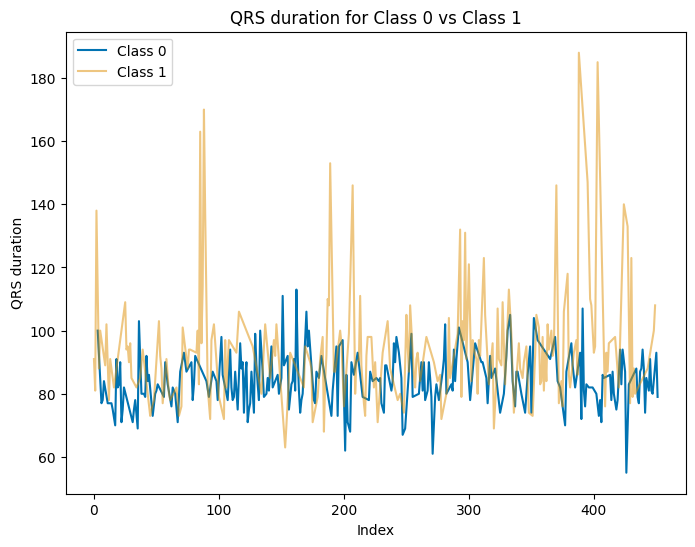

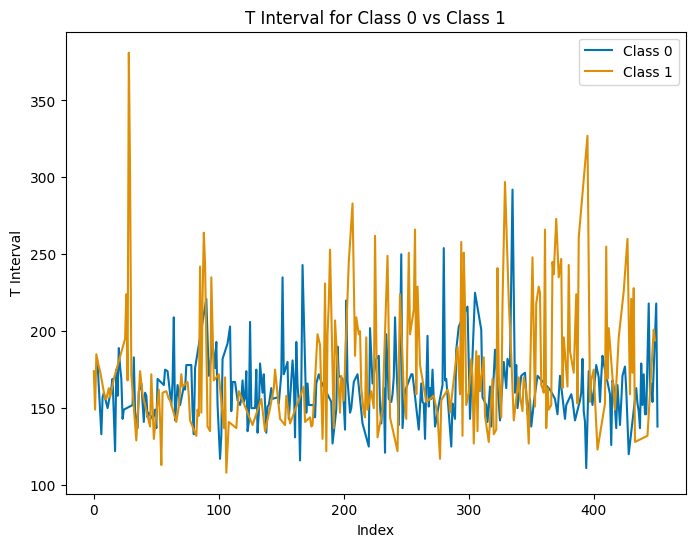

In [238]:
# Define the data for the first plot
QRSdur_0 = df[df['label'] == 0]['QRSduration']
QRSdur_1 = df[df['label'] == 1]['QRSduration']

# Plot QRS duration for class 0 and class 1
plt.figure(figsize=(8, 6))
plt.plot(QRSdur_0, label='Class 0')
plt.plot(QRSdur_1, label='Class 1', alpha=0.5)
plt.title('QRS duration for Class 0 vs Class 1')
plt.xlabel('Index')
plt.ylabel('QRS duration')
plt.legend()
plt.grid(False)  # Disable gridlines

# Save the first plot into the figures folder with a proper filename prefix and reference
filename_qrs = 'uci_qrs_duration_class_comparison.png'
filepath_qrs = os.path.join(figures_folder, filename_qrs)
plt.savefig(filepath_qrs)

# Show the plot
plt.show()

# Define the data for the second plot
T_interval_0 = df[df['label'] == 0]['Tinterval']
T_interval_1 = df[df['label'] == 1]['Tinterval']

# Plot T interval for class 0 and class 1
plt.figure(figsize=(8, 6))
plt.plot(T_interval_0, label='Class 0')
plt.plot(T_interval_1, label='Class 1')
plt.title('T Interval for Class 0 vs Class 1')
plt.xlabel('Index')
plt.ylabel('T Interval')
plt.legend()
plt.grid(False)  # Disable gridlines

# Save the second plot into the figures folder with a proper filename prefix and reference
filename_t_interval = 'uci_t_interval_class_comparison.png'
filepath_t_interval = os.path.join(figures_folder, filename_t_interval)
plt.savefig(filepath_t_interval)

# Show the plot
plt.show()

In [226]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0,1
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0,1


In [227]:
#df.to_csv('arrhythmia_preprocessed_cleaned_classes_label.csv')